In [1]:
import os

def extract_flows_from_pcap(filepath: str, output_folder: str, output_name: str):
    basename = os.path.basename(filepath)
    flow_filename = f"{output_folder}/{output_name}_flow.csv"
    index_filename = f"{output_folder}/{output_name}_index.txt"

    os.system(f'sudo -S java -Djava.library.path="../../dataset/Tools/jnetpcap-1.4.r1500" -jar ../../dataset/Tools/CICFlowMeterV3-0.0.4-SNAPSHOT.jar {filepath} {output_folder} < ../../dataset/sudo_password.txt')
    
    os.rename(f"{output_folder}/{basename}_Flow.csv", flow_filename)
    os.rename(f"{output_folder}/{basename}_Flow.csv_index.txt", index_filename)

    return flow_filename, index_filename

In [2]:
extract_flows_from_pcap("/mnt/extra/datasets/pcap/wedfri_test.pcap", "./rerun", "wedfritest")

[sudo] password for meervix: 

cic.cs.unb.ca.ifm.Cmd You select: /mnt/extra/datasets/pcap/wedfri_test.pcap
cic.cs.unb.ca.ifm.Cmd Out folder: ./rerun
cic.cs.unb.ca.ifm.Cmd CICFlowMeter received 1 pcap file
Working on... wedfri_test.pcap
wedfri_test.pcap is done. total 132892 flows 
Packet stats: Total=1810765,Valid=1810765,Discarded=0
-------------------------------------------------------------------------------


('./rerun/wedfritest_flow.csv', './rerun/wedfritest_index.txt')

In [3]:
flow_packets = []
with open("./rerun/wedfritest_index.txt") as file:
    for line in file:
        indexes = line.strip().split(",")
        if len(indexes[-1]) == 0:
            indexes = indexes[:-1]
        indexes = [int(x) for x in indexes]
        flow_packets.append(indexes)

In [4]:
flow_packets

[[1012, 5531, 1050, 5534],
 [7016,
  7038,
  7039,
  7061,
  7064,
  7067,
  7088,
  8589,
  9187,
  9201,
  9205,
  9235,
  9257,
  9260,
  9261,
  10038,
  11819,
  13894,
  14699,
  15398,
  16401,
  16777,
  18298,
  18921,
  19590,
  7037,
  7058,
  7060,
  7062,
  7063,
  7081,
  8611,
  9202,
  9203,
  9204,
  9256,
  9258,
  9259,
  10044,
  11949,
  13926,
  14714,
  15408,
  16412,
  16789,
  18314,
  18922,
  19600],
 [7214,
  7215,
  7412,
  8689,
  8690,
  8888,
  9500,
  9501,
  9642,
  10225,
  12973,
  14261,
  15151,
  15562,
  15732,
  16445,
  16845,
  17749,
  17898,
  18818,
  19090,
  19254,
  19700,
  19701,
  19781,
  7262,
  7263,
  7411,
  8735,
  8736,
  8887,
  9550,
  9551,
  9641,
  10237,
  12983,
  14268,
  15156,
  15663,
  15664,
  15731,
  16452,
  16849,
  17806,
  17807,
  17897,
  18824,
  19139,
  19140,
  19253,
  19744,
  19745,
  19780],
 [7531,
  7544,
  7546,
  7548,
  7550,
  7551,
  7553,
  7555,
  7558,
  8971,
  8974,
  8976,
  8978,
  89

In [5]:
import pandas as pd
import numpy as np

In [6]:
flow_packets_set = [set(i) for i in flow_packets]
flow_packets_set

[{1012, 1050, 5531, 5534},
 {7016,
  7037,
  7038,
  7039,
  7058,
  7060,
  7061,
  7062,
  7063,
  7064,
  7067,
  7081,
  7088,
  8589,
  8611,
  9187,
  9201,
  9202,
  9203,
  9204,
  9205,
  9235,
  9256,
  9257,
  9258,
  9259,
  9260,
  9261,
  10038,
  10044,
  11819,
  11949,
  13894,
  13926,
  14699,
  14714,
  15398,
  15408,
  16401,
  16412,
  16777,
  16789,
  18298,
  18314,
  18921,
  18922,
  19590,
  19600},
 {7214,
  7215,
  7262,
  7263,
  7411,
  7412,
  8689,
  8690,
  8735,
  8736,
  8887,
  8888,
  9500,
  9501,
  9550,
  9551,
  9641,
  9642,
  10225,
  10237,
  12973,
  12983,
  14261,
  14268,
  15151,
  15156,
  15562,
  15663,
  15664,
  15731,
  15732,
  16445,
  16452,
  16845,
  16849,
  17749,
  17806,
  17807,
  17897,
  17898,
  18818,
  18824,
  19090,
  19139,
  19140,
  19253,
  19254,
  19700,
  19701,
  19744,
  19745,
  19780,
  19781},
 {7531,
  7537,
  7543,
  7544,
  7545,
  7546,
  7547,
  7548,
  7549,
  7550,
  7551,
  7552,
  7553,
  75

In [7]:
with open("./detected_ksql_slowhttptest.txt") as file:
    detected_idxs = [int(x.strip()) for x in file.readlines()]
detected_idx_set = set(detected_idxs)
detected_idx_set

{394326,
 394352,
 394367,
 394392,
 787814,
 787816,
 787994,
 787998,
 788000,
 788003,
 788004,
 788006,
 788017,
 788019,
 788021,
 788023,
 788024,
 788026,
 788029,
 788031,
 788034,
 788035,
 788038,
 788039,
 788042,
 788043,
 788045,
 788049,
 788051,
 788054,
 788057,
 788058,
 788059,
 788062,
 788063,
 788066,
 788068,
 788069,
 788071,
 788073,
 788076,
 788077,
 788080,
 788083,
 788084,
 788085,
 788088,
 788089,
 788092,
 788093,
 788095,
 788099,
 788100,
 788102,
 788103,
 788106,
 788107,
 788111,
 788112,
 788113,
 788116,
 788118,
 788120,
 788121,
 788123,
 788127,
 788128,
 788130,
 788132,
 788134,
 788135,
 788139,
 788140,
 788141,
 788146,
 788148,
 788149,
 788150,
 788151,
 788153,
 788156,
 788158,
 788160,
 788161,
 788164,
 788165,
 788168,
 788170,
 788172,
 788173,
 788176,
 788177,
 788180,
 788183,
 788185,
 788186,
 788188,
 788190,
 788192,
 788193,
 788196,
 788198,
 788201,
 788203,
 788204,
 788207,
 788208,
 788209,
 788212,
 788213,
 788215,
 

In [8]:
is_detected = np.array([len(detected_idx_set.intersection(flow_packet_set)) > 0 for flow_packet_set in flow_packets_set])
is_detected = pd.Series(is_detected)
is_detected

0         False
1         False
2         False
3         False
4         False
          ...  
132886    False
132887     True
132888    False
132889     True
132890    False
Length: 132891, dtype: bool

In [17]:
flink_test = pd.read_csv('../../dataset/OutputMay2025/wedfri_2_test_flinked.csv', index_col=0)
flink_test

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Fwd TCP Retrans. Count,Bwd TCP Retrans. Count,Total TCP Retrans. Count,Total Connection Flow Time,Label
index,,,,,,,,,,,,,,,,,,,,,
0,2610baa0-ecfa-44ab-b60c-1eb17787bc55,192.168.10.14,51511,192.168.10.50,22,6,2017-07-05 13:33:29.578064,1451560.0,41,47,...,0.0,0.0,0.0,0,0,20,23,43,0,Benign
1,768f700b-d2df-481e-9462-7546138c2a41,192.168.10.12,34542,63.251.98.12,80,6,2017-07-05 13:33:31.550907,1081537.0,5,5,...,0.0,0.0,0.0,0,0,0,0,0,0,Benign
2,c74b845c-854e-4b81-9f8c-47dd702b5d38,192.168.10.16,46930,192.168.10.50,22,6,2017-07-05 13:33:32.172536,1338817.0,43,46,...,0.0,0.0,0.0,0,0,21,23,44,0,Benign
3,9736f44c-186e-4b26-a71f-3d9dd77082dc,192.168.10.19,38585,23.52.155.27,80,6,2017-07-05 13:33:28.814942,5103544.0,4,3,...,0.0,5049642.0,5049642.0,0,0,1,1,2,0,Benign
4,b0194291-62af-4489-8101-c8947062051a,192.168.10.19,35745,172.217.12.134,443,6,2017-07-05 13:33:28.662094,5262932.0,8,6,...,0.0,5049790.0,5049790.0,0,0,0,0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132717,cdcfdb90-c9b1-4aaa-bc4b-178ee207dd4b,192.168.10.50,42910,192.168.10.3,389,6,2017-07-07 20:02:38.387716,72263.0,8,4,...,0.0,0.0,0.0,0,0,4,2,6,0,Benign
132718,d4c8ef86-3503-4cd8-ba98-d4bf2ee90b71,192.168.10.8,51617,192.168.10.3,53,17,2017-07-07 20:02:38.574765,261.0,2,2,...,0.0,0.0,0.0,0,0,0,0,0,0,Benign
132719,e87736ae-ac78-4f3c-98fc-abbdb0cebc99,192.168.10.8,10414,192.168.10.3,445,6,2017-07-07 20:02:38.575222,247267.0,16,12,...,0.0,0.0,0.0,0,0,8,6,14,0,Benign


In [18]:
cicflow_test = pd.read_csv("./rerun/wedfritest_flow.csv")
cicflow_test

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Fwd TCP Retrans. Count,Bwd TCP Retrans. Count,Total TCP Retrans. Count,Total Connection Flow Time,Label
0,192.168.10.3-192.168.10.1-62459-53-17,192.168.10.3,62459,192.168.10.1,53,17,2017-07-05 13:33:29.791355,13057859,2,2,...,0.000000e+00,12954075.0,12954075.0,-1,-1,0,0,0,13057859,NeedManualLabel
1,192.168.10.51-52.11.164.190-54627-443-6,192.168.10.51,54627,52.11.164.190,443,6,2017-07-05 13:33:52.582417,113484334,25,23,...,2.100232e+04,10027347.0,9959910.0,-1,-1,9,9,18,113484334,NeedManualLabel
2,192.168.10.12-208.46.17.81-40524-80-6,192.168.10.12,40524,208.46.17.81,80,6,2017-07-05 13:33:56.747177,111094751,25,28,...,2.061780e+06,10240106.0,5039426.0,-1,-1,4,4,8,111094751,NeedManualLabel
3,192.168.10.12-151.101.208.249-39100-443-6,192.168.10.12,39100,151.101.208.249,443,6,2017-07-05 13:33:57.325750,110893314,160,217,...,2.003435e+06,10248719.0,5317307.0,-1,-1,4,4,8,110893314,NeedManualLabel
4,192.168.10.51-72.21.91.29-34755-80-6,192.168.10.51,34755,72.21.91.29,80,6,2017-07-05 13:33:52.544010,119852435,21,17,...,8.512104e+05,10024399.0,7070318.0,-1,-1,9,9,18,119852435,NeedManualLabel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132886,192.168.10.15-192.168.10.3-56780-53-17,192.168.10.15,56780,192.168.10.3,53,17,2017-07-07 18:05:54.516184,165,2,2,...,0.000000e+00,0.0,0.0,-1,-1,0,0,0,165,NeedManualLabel
132887,172.16.0.1-192.168.10.50-64318-2222-6,172.16.0.1,64318,192.168.10.50,2222,6,2017-07-07 18:09:11.499555,64,1,1,...,0.000000e+00,0.0,0.0,-1,-1,0,0,0,64,NeedManualLabel
132888,192.168.10.17-192.168.10.3-8398-53-17,192.168.10.17,8398,192.168.10.3,53,17,2017-07-07 18:12:10.812610,61049,2,2,...,0.000000e+00,0.0,0.0,-1,-1,0,0,0,61049,NeedManualLabel
132889,172.16.0.1-192.168.10.50-41249-58080-6,172.16.0.1,41249,192.168.10.50,58080,6,2017-07-07 18:08:57.752078,49,1,1,...,0.000000e+00,0.0,0.0,-1,-1,0,0,0,49,NeedManualLabel


In [19]:
distinguishing_keys = [
    'Src IP',
    'Src Port',
    'Dst IP',
    'Dst Port',
    'Timestamp',
]

In [20]:
flink_test_keys = flink_test[distinguishing_keys]
has_duplicate = (flink_test_keys.duplicated(keep=False)).any()
print(f"Has Duplicates? {has_duplicate}")

flink_test = flink_test[~flink_test_keys.duplicated(keep=False)]
# flink_test

Has Duplicates? False


In [21]:
cicflow_test_keys = cicflow_test.reset_index().rename(columns={"index": "cic_index"})[distinguishing_keys + ['cic_index']]
has_duplicate = (cicflow_test_keys.duplicated(keep=False)).any()
print(f"Has Duplicates? {has_duplicate}")

cicflow_test = cicflow_test[~cicflow_test_keys.duplicated(keep=False)]
# cicflow_test

Has Duplicates? False


In [22]:
left_merge = flink_test_keys.reset_index().merge(cicflow_test_keys, on=distinguishing_keys, how='left', indicator=True).set_index('index')
left_merge

,Src IP,Src Port,Dst IP,Dst Port,Timestamp,cic_index,_merge
index,,,,,,,
0,192.168.10.14,51511,192.168.10.50,22,2017-07-05 13:33:29.578064,40707.0,both
1,192.168.10.12,34542,63.251.98.12,80,2017-07-05 13:33:31.550907,56299.0,both
2,192.168.10.16,46930,192.168.10.50,22,2017-07-05 13:33:32.172536,117539.0,both
3,192.168.10.19,38585,23.52.155.27,80,2017-07-05 13:33:28.814942,88862.0,both
4,192.168.10.19,35745,172.217.12.134,443,2017-07-05 13:33:28.662094,46995.0,both
...,...,...,...,...,...,...,...
132717,192.168.10.50,42910,192.168.10.3,389,2017-07-07 20:02:38.387716,67118.0,both
132718,192.168.10.8,51617,192.168.10.3,53,2017-07-07 20:02:38.574765,113291.0,both
132719,192.168.10.8,10414,192.168.10.3,445,2017-07-07 20:02:38.575222,79192.0,both


In [23]:
flink_test_ignored = left_merge[left_merge['_merge'] == 'left_only']
flink_test_ignored_idx = flink_test_ignored.index
flink_test = flink_test.drop(index=flink_test_ignored_idx)
flink_test

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Fwd TCP Retrans. Count,Bwd TCP Retrans. Count,Total TCP Retrans. Count,Total Connection Flow Time,Label
index,,,,,,,,,,,,,,,,,,,,,
0,2610baa0-ecfa-44ab-b60c-1eb17787bc55,192.168.10.14,51511,192.168.10.50,22,6,2017-07-05 13:33:29.578064,1451560.0,41,47,...,0.0,0.0,0.0,0,0,20,23,43,0,Benign
1,768f700b-d2df-481e-9462-7546138c2a41,192.168.10.12,34542,63.251.98.12,80,6,2017-07-05 13:33:31.550907,1081537.0,5,5,...,0.0,0.0,0.0,0,0,0,0,0,0,Benign
2,c74b845c-854e-4b81-9f8c-47dd702b5d38,192.168.10.16,46930,192.168.10.50,22,6,2017-07-05 13:33:32.172536,1338817.0,43,46,...,0.0,0.0,0.0,0,0,21,23,44,0,Benign
3,9736f44c-186e-4b26-a71f-3d9dd77082dc,192.168.10.19,38585,23.52.155.27,80,6,2017-07-05 13:33:28.814942,5103544.0,4,3,...,0.0,5049642.0,5049642.0,0,0,1,1,2,0,Benign
4,b0194291-62af-4489-8101-c8947062051a,192.168.10.19,35745,172.217.12.134,443,6,2017-07-05 13:33:28.662094,5262932.0,8,6,...,0.0,5049790.0,5049790.0,0,0,0,0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132717,cdcfdb90-c9b1-4aaa-bc4b-178ee207dd4b,192.168.10.50,42910,192.168.10.3,389,6,2017-07-07 20:02:38.387716,72263.0,8,4,...,0.0,0.0,0.0,0,0,4,2,6,0,Benign
132718,d4c8ef86-3503-4cd8-ba98-d4bf2ee90b71,192.168.10.8,51617,192.168.10.3,53,17,2017-07-07 20:02:38.574765,261.0,2,2,...,0.0,0.0,0.0,0,0,0,0,0,0,Benign
132719,e87736ae-ac78-4f3c-98fc-abbdb0cebc99,192.168.10.8,10414,192.168.10.3,445,6,2017-07-07 20:02:38.575222,247267.0,16,12,...,0.0,0.0,0.0,0,0,8,6,14,0,Benign


In [24]:
flink_test['Label'].value_counts(dropna=False)

Label
Benign          99684
Portscan        31749
Slowhttptest      893
Name: count, dtype: int64

In [25]:
left_merge_chosen = left_merge[left_merge['_merge'] == 'both']
left_merge_chosen['cic_index'] = left_merge_chosen['cic_index'].astype(int)
left_merge_chosen

/tmp/ipykernel_43995/2792581419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_merge_chosen['cic_index'] = left_merge_chosen['cic_index'].astype(int)


,Src IP,Src Port,Dst IP,Dst Port,Timestamp,cic_index,_merge
index,,,,,,,
0,192.168.10.14,51511,192.168.10.50,22,2017-07-05 13:33:29.578064,40707,both
1,192.168.10.12,34542,63.251.98.12,80,2017-07-05 13:33:31.550907,56299,both
2,192.168.10.16,46930,192.168.10.50,22,2017-07-05 13:33:32.172536,117539,both
3,192.168.10.19,38585,23.52.155.27,80,2017-07-05 13:33:28.814942,88862,both
4,192.168.10.19,35745,172.217.12.134,443,2017-07-05 13:33:28.662094,46995,both
...,...,...,...,...,...,...,...
132717,192.168.10.50,42910,192.168.10.3,389,2017-07-07 20:02:38.387716,67118,both
132718,192.168.10.8,51617,192.168.10.3,53,2017-07-07 20:02:38.574765,113291,both
132719,192.168.10.8,10414,192.168.10.3,445,2017-07-07 20:02:38.575222,79192,both


In [26]:
(flink_test.index != left_merge_chosen.index).any()

False

In [27]:
flink_test.index = left_merge_chosen['cic_index']

In [28]:
ignored_indexes = list(set(is_detected.index).difference(set(flink_test.index)))
ignored_indexes

[12289,
 106502,
 51207,
 71690,
 6156,
 114700,
 81937,
 6167,
 6168,
 36889,
 108569,
 18465,
 4135,
 65582,
 129070,
 104500,
 114746,
 53307,
 102465,
 20547,
 20548,
 69,
 20551,
 20552,
 90183,
 20555,
 118862,
 6224,
 2131,
 125013,
 10326,
 114779,
 22620,
 90204,
 4193,
 18534,
 18535,
 59500,
 18541,
 18542,
 36977,
 114801,
 94323,
 106617,
 123,
 96386,
 18564,
 127110,
 90251,
 22674,
 22675,
 39060,
 71831,
 98459,
 69791,
 106655,
 22689,
 22698,
 22700,
 114860,
 26801,
 30898,
 78002,
 2235,
 41154,
 16584,
 98505,
 92363,
 32979,
 73939,
 12503,
 116959,
 49379,
 63720,
 82154,
 65779,
 22772,
 69876,
 28921,
 35067,
 8450,
 4356,
 69892,
 80132,
 20747,
 6412,
 92433,
 39190,
 4377,
 49436,
 20766,
 20767,
 20768,
 20769,
 20770,
 20772,
 45354,
 22829,
 22830,
 123185,
 22836,
 22838,
 53561,
 22842,
 88383,
 131392,
 37186,
 69960,
 84298,
 10583,
 92515,
 98690,
 123266,
 29067,
 57742,
 80280,
 88482,
 63910,
 121258,
 20907,
 20908,
 20909,
 20910,
 20914,
 9054

In [29]:
is_detected = is_detected.drop(index=ignored_indexes)
is_detected

0         False
1         False
2         False
3         False
4         False
          ...  
132886    False
132887     True
132888    False
132889     True
132890    False
Length: 132326, dtype: bool

In [30]:
flink_test = flink_test.sort_index()

In [31]:
(is_detected.index != flink_test.index).any()

False

In [43]:
flink_test[(flink_test['Label'] == 'Slowloris') & (flink_test['Src Port'] == 54018)]

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Idle Max,Idle Min,ICMP Code,ICMP Type,Fwd TCP Retrans. Count,Bwd TCP Retrans. Count,Total TCP Retrans. Count,Total Connection Flow Time,Label,Prediction
cic_index,,,,,,,,,,,,,,,,,,,,,
1,07c064ef-d0db-475f-931f-38c1b7963cab,172.16.0.1,54018,192.168.10.50,80,6,2017-07-05 13:06:06.833561,41.0,1,1,...,0.0,0.0,0,0,0,0,0,0,Slowloris,Benign
64910,568d5ec3-9750-4083-9f28-62df3af49032,172.16.0.1,54018,192.168.10.50,80,6,2017-07-05 13:08:15.865659,115884818.0,3,3,...,115874792.0,115874792.0,0,0,0,0,0,0,Slowloris,Benign


In [33]:
flink_test[flink_test['Label'] == 'Slowhttptest']

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Fwd TCP Retrans. Count,Bwd TCP Retrans. Count,Total TCP Retrans. Count,Total Connection Flow Time,Label
cic_index,,,,,,,,,,,,,,,,,,,,,
3406,1167589f-706e-45f0-a8a7-6f281eef4f58,172.16.0.1,48992,192.168.10.50,80,6,2017-07-05 13:33:28.735404,63138138.0,7,0,...,1.224271e+07,32063555.0,8015897.0,0,0,6,0,6,0,Slowhttptest
5653,1e38bd0d-69c1-47ab-a0bd-b177cb0bb123,172.16.0.1,49008,192.168.10.50,80,6,2017-07-05 13:33:28.777435,63096361.0,7,0,...,1.222380e+07,32032062.0,8023917.0,0,0,6,0,6,0,Slowhttptest
24560,abb52bac-631e-483b-9436-9ecbddf84dcc,172.16.0.1,49462,192.168.10.50,80,6,2017-07-05 13:33:29.956046,63133548.0,7,0,...,1.224298e+07,32063886.0,8015703.0,0,0,6,0,6,0,Slowhttptest
24817,1ccd0330-7357-4a1d-8c01-5304db8de428,172.16.0.1,50654,192.168.10.50,80,6,2017-07-05 13:34:52.730233,30663656.0,12,3,...,4.173007e+06,12832083.0,5001611.0,0,0,9,1,10,0,Slowhttptest
24863,333583f0-c545-48d7-b0fb-060c08baa2f0,172.16.0.1,50294,192.168.10.50,80,6,2017-07-05 13:33:32.099999,63101744.0,7,0,...,1.224621e+07,32063609.0,8015895.0,0,0,6,0,6,0,Slowhttptest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132477,8ac85b6f-f99b-43af-b4f3-1c7fd5398b5e,172.16.0.1,50222,192.168.10.50,80,6,2017-07-05 13:33:31.914589,63158734.0,7,0,...,1.226174e+07,32095460.0,8016187.0,0,0,6,0,6,0,Slowhttptest
132564,a0039707-4584-4bcf-8015-811c8804cbb6,172.16.0.1,49506,192.168.10.50,80,6,2017-07-05 13:33:30.069772,63084296.0,7,0,...,1.222734e+07,32032317.0,8016114.0,0,0,6,0,6,0,Slowhttptest
132672,2438c155-f033-4614-830c-bb5fcdc0a12a,172.16.0.1,50326,192.168.10.50,80,6,2017-07-05 13:33:32.182098,63147338.0,7,0,...,1.226540e+07,32095702.0,8008134.0,0,0,6,0,6,0,Slowhttptest


In [34]:
flink_test['Prediction'] = np.where(is_detected, 'Slowhttptest', 'Benign')
flink_test

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Idle Max,Idle Min,ICMP Code,ICMP Type,Fwd TCP Retrans. Count,Bwd TCP Retrans. Count,Total TCP Retrans. Count,Total Connection Flow Time,Label,Prediction
cic_index,,,,,,,,,,,,,,,,,,,,,
0,ac2a4018-4165-4c40-9b6a-4fbbb6215b7b,192.168.10.3,62459,192.168.10.1,53,17,2017-07-05 13:33:29.791355,13057859.0,2,2,...,12954075.0,12954075.0,0,0,0,0,0,0,Benign,Benign
1,9db5b8b3-7942-42e2-ad8a-9b66d2e009ed,192.168.10.51,54627,52.11.164.190,443,6,2017-07-05 13:33:52.582417,113484334.0,25,23,...,10027347.0,9959910.0,0,0,9,9,18,0,Benign,Benign
2,7c3ee223-2bed-43a1-bbe3-a9fb5d6c5ef1,192.168.10.12,40524,208.46.17.81,80,6,2017-07-05 13:33:56.747177,111094751.0,25,28,...,10240106.0,5039426.0,0,0,4,4,8,0,Benign,Benign
3,cac067ba-aa17-4797-bdeb-618f28d4ea48,192.168.10.12,39100,151.101.208.249,443,6,2017-07-05 13:33:57.325750,110893314.0,160,217,...,10248719.0,5317307.0,0,0,4,4,8,0,Benign,Benign
4,7bdb0a84-875f-4ccf-96df-2f9398415aa5,192.168.10.51,34755,72.21.91.29,80,6,2017-07-05 13:33:52.544010,119852435.0,21,17,...,10024399.0,7070318.0,0,0,9,9,18,0,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132886,d4ae998a-3138-499b-aae9-983a68c5ebe9,192.168.10.15,56780,192.168.10.3,53,17,2017-07-07 18:05:54.516184,165.0,2,2,...,0.0,0.0,0,0,0,0,0,0,Benign,Benign
132887,53b07353-2490-4422-942c-9d7e526ee959,172.16.0.1,64318,192.168.10.50,2222,6,2017-07-07 18:09:11.499555,64.0,1,1,...,0.0,0.0,0,0,0,0,0,0,Portscan,Slowhttptest
132888,1c0e0f92-cdb7-463f-8d67-2ba4d3117c24,192.168.10.17,8398,192.168.10.3,53,17,2017-07-07 18:12:10.812610,61049.0,2,2,...,0.0,0.0,0,0,0,0,0,0,Benign,Benign


In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(['Benign', 'Portscan', 'Slowhttptest'])

LabelEncoder()

In [36]:
label_encoder.classes_

array(['Benign', 'Portscan', 'Slowhttptest'], dtype='<U12')

In [37]:
y_true = label_encoder.transform(flink_test['Label'])

In [38]:
y_pred = label_encoder.transform(flink_test['Prediction'])

/home/meervix/Projects/thesis/intrusion-detection/ai-detection/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision of KSQL: 0.7442744476507798
Recall of KSQL: 0.7479180206459803
F1-score of KSQL: 0.7460917857865054


/home/meervix/Projects/thesis/intrusion-detection/ai-detection/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/meervix/Projects/thesis/intrusion-detection/ai-detection/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     99684
           1       0.00      0.00      0.00     31749
           2       0.00      0.00      0.00       893

    accuracy                           0.75    132326
   macro avg       0.33      0.33      0.33    132326
weighted avg       0.74      0.75      0.75    132326



/home/meervix/Projects/thesis/intrusion-detection/ai-detection/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


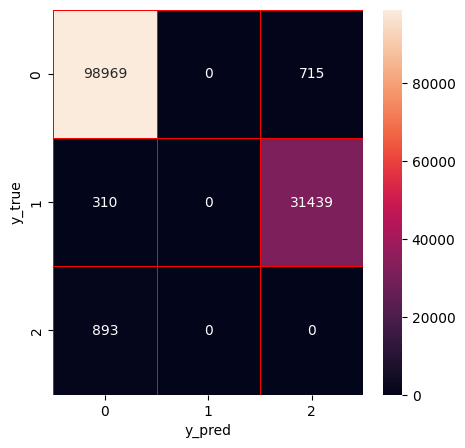

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_fscore_support

# Evaluation metrics
# dt_score = dt.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Print results
# print('Accuracy of DT: ' + str(dt_score))
print('Precision of KSQL: ' + str(precision))
print('Recall of KSQL: ' + str(recall))
print('F1-score of KSQL: ' + str(fscore))
print(classification_report(y_true, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()